In [1]:
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [4]:
face_problem_types = ['DARK CIRCLES ON FACE','DARK SPOTS ON FACE','EYE BAGS','DRY SKIN','OILY SKIN','FACE REDNESS',
          'DULL SKIN','ROUGH TEXTURE ON FACE','LARGE PORES ON FACE','UNDER-EYE WRINKLES','HORMONAL ACNE',
          'BLACKHEADS','SEBACEOUS FILAMENTS','FOREHEAD WRINKLES','RAZOR BUMPS']
path = Path('Skin_Problems')

In [5]:
if not path.exists():
    path.mkdir()
    for face_problem_type in face_problem_types:
        dest = (path/face_problem_type)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(face_problem_type,max_images=500)
        download_images(dest, urls=results)

In [6]:
fns = get_image_files(path)
fns

(#4779) [Path('Skin_Problems/BLACKHEADS/0043cf37-b2b4-479e-946b-80d41d574a9f.png'),Path('Skin_Problems/BLACKHEADS/00d65bdd-e4f4-4ad1-afee-00cfab308f0c.jpg'),Path('Skin_Problems/BLACKHEADS/00ebcb66-e5b7-433d-9a6a-57723c0ddbf1.jpg'),Path('Skin_Problems/BLACKHEADS/01523dc1-2a6c-4fc1-aa37-b1efdbd6a38d.jpg'),Path('Skin_Problems/BLACKHEADS/01842f3a-ec9c-4ec9-8b9d-c12ed6db6c7c.jpg'),Path('Skin_Problems/BLACKHEADS/01a1f008-5617-491c-8ced-c185411d3c95.jpg'),Path('Skin_Problems/BLACKHEADS/02f06bc7-4ee6-4e5a-b2b2-05b5655340df.jpg'),Path('Skin_Problems/BLACKHEADS/02ffc6d4-42fb-47cd-bff4-775d169535c4.png'),Path('Skin_Problems/BLACKHEADS/031737f5-02b8-46e5-9ed9-cefe8ebb3121.jpg'),Path('Skin_Problems/BLACKHEADS/04043564-45f4-4251-ac6e-6e394c561c28.jpg')...]

In [7]:
failed = verify_images(fns)
failed

(#0) []

In [8]:
failed.map(Path.unlink);

In [9]:
face_problems = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
dls = face_problems.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


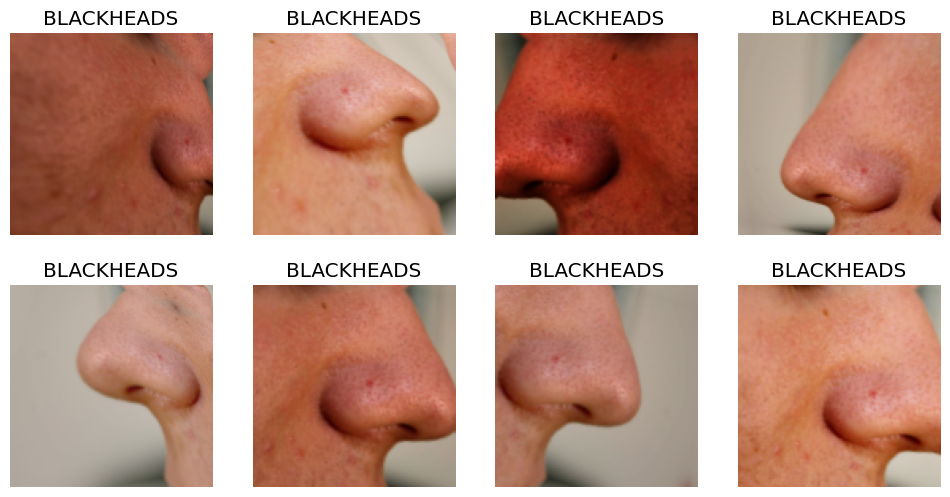

In [11]:
face_problems = face_problems.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = face_problems.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [12]:
face_problems = face_problems.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(),
)
dls = face_problems.dataloaders(path,bs=16)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [13]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(5)

D:\Anaconda\envs\development\lib\site-packages\fastai\vision\learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
D:\Anaconda\envs\development\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
D:\Anaconda\envs\development\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


D:\Anaconda\envs\development\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


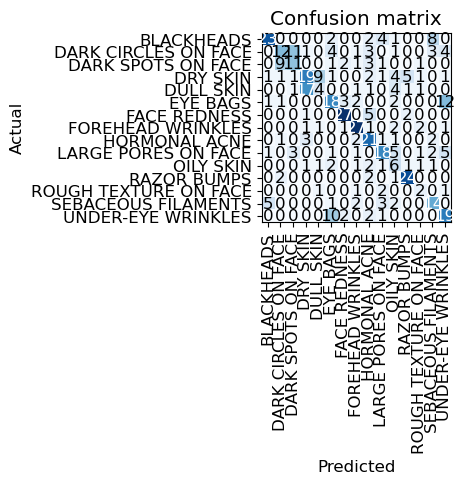

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

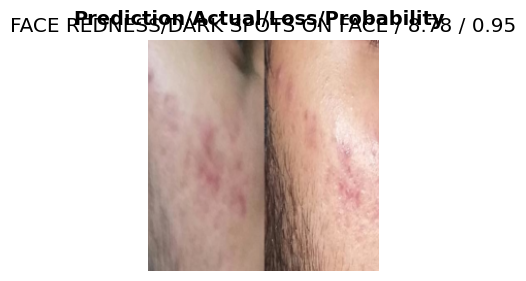

In [15]:
interp.plot_top_losses(1, nrows=1)

In [16]:
learn.export()

In [17]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
learn_inf = load_learner(path/'export.pkl')

In [19]:
learn_inf.predict('harmonal_acne.jpg')

('HORMONAL ACNE',
 TensorBase(8),
 TensorBase([1.1053e-04, 1.6048e-02, 1.4802e-02, 2.4759e-04, 1.3278e-04, 1.8551e-05, 8.4456e-04, 3.2664e-05, 9.6585e-01, 6.7078e-04, 2.2416e-04, 6.8241e-04, 1.9070e-04, 1.1752e-04, 2.5667e-05]))

In [20]:
learn_inf.dls.vocab

['BLACKHEADS', 'DARK CIRCLES ON FACE', 'DARK SPOTS ON FACE', 'DRY SKIN', 'DULL SKIN', 'EYE BAGS', 'FACE REDNESS', 'FOREHEAD WRINKLES', 'HORMONAL ACNE', 'LARGE PORES ON FACE', 'OILY SKIN', 'RAZOR BUMPS', 'ROUGH TEXTURE ON FACE', 'SEBACEOUS FILAMENTS', 'UNDER-EYE WRINKLES']

In [21]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

In [22]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['harmonal_acne.jpg'])

In [23]:
img = PILImage.create(btn_upload.data[-1])

In [24]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [25]:
pred,pred_idx,probs = learn_inf.predict(img)

In [26]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: HORMONAL ACNE; Probability: 0.9659')

In [27]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [28]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [29]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [30]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

AttributeError: 'FileUpload' object has no attribute 'data'

AttributeError: 'FileUpload' object has no attribute 'data'

In [31]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [33]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

D:\Anaconda\envs\development\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
D:\Anaconda\envs\development\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://17245.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x236ab2dfdc0>,
 'http://127.0.0.1:7860/',
 'https://17245.gradio.app')

In [39]:
import gradio as gr
from fastai.vision.all import *
import skimage

learn = load_learner('export.pkl')

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

title = "Face condition Analyzer"
description = "A face condition detector trained on the custom dataset with fastai. Created using Gradio and HuggingFace Spaces."
examples = ['harmonal_acne.jpg','forehead_wrinkles.jpg','oily_skin.jpg']
enable_queue=True

gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=3),title=title,
             description=description,examples=examples,enable_queue=enable_queue).launch(share=True)

D:\Anaconda\envs\development\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
D:\Anaconda\envs\development\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:40: UserWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  warnings.w

Running on local URL:  http://127.0.0.1:7865
Running on public URL: https://16570.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x23819b56b20>,
 'http://127.0.0.1:7865/',
 'https://16570.gradio.app')

In [16]:
import gradio as gr
from fastai.vision.all import *
import skimage
import pathlib
import pandas as pd

plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath
title = "Face condition Analyzer"
description = "A face condition detector trained on the custom dataset with fastai. Created using Gradio and HuggingFace Spaces."
examples = [['harmonal_acne.jpg'],['forehead_wrinkles.jpg'],['oily_skin.jpg']]
enable_queue=True

with gr.Blocks(title=title,description=description,examples=examples,enable_queue=enable_queue) as demo:
    learn = load_learner('export.pkl')
    labels = learn.dls.vocab
    def predict(img):
        img = PILImage.create(img)
        pred,pred_idx,probs = learn.predict(img)
        return {labels[i]: float(probs[i]) for i in range(len(labels))}
    gr.Markdown("# Face Skin Analyzer")
    gr.Markdown("A face condition detector trained on the custom dataset with fastai. Created using Gradio and HuggingFace Spaces. Kindly upload a photo of your face.")
    with gr.Row():
        inputs = gr.inputs.Image(shape=(512, 512))
        outputs = gr.outputs.Label(num_top_classes=3)
    btn = gr.Button("Predict")
    btn.click(fn=predict, inputs=inputs, outputs=outputs)
    
    df=pd.read_excel("recommendation.xlsx")
    classes = df['class'].unique()
    with gr.Accordion("Find your skin condition using above analyzer and see the Recommended solutions",open=True):
        for c in classes:
            with gr.Accordion(c,open=False):
                df_temp = df[df['class']==c]
                with gr.Row():
                    for i,current_row in df_temp.iterrows():
                        with gr.Column():
                            html_box = gr.HTML("<a href='{}'><img src ='{}'></a>".format(current_row['profit_link'],current_row['product_image']))                   
demo.launch()

D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:40: UserWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  warnings.warn(value)
D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:43: UserWarning: You have unused kwarg parameters in Blocks, please remove them: {'description': 'A face condition detector trained on the custom dataset with fastai. Created using Gradio and HuggingFace Spaces.', 'examples': [['harmonal_acne.jpg'], ['forehead_wrinkles.jpg'], ['oily_skin.jpg']]}
  warnings.warn(
D:\Anaconda\envs\development\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
D:\Anaconda\envs\development\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
D:\Anaconda\envs\develop

Running on local URL:  http://127.0.0.1:7875

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x17529404130>, 'http://127.0.0.1:7875/', None)